In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1083,2020-07-22,United Kingdom,296362.0,295817.0,45399.0,45422.0,545.0,-23.0
1084,2020-07-22,Germany,202680.0,202799.0,9101.0,9095.0,-119.0,6.0
1085,2020-07-22,Iran,279595.0,278827.0,14586.0,14634.0,768.0,-48.0
1086,2020-07-22,Turkey,221461.0,221500.0,5523.0,5526.0,-39.0,-3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3308.9025735294117
RMSE =  9117.213963984475


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.50183823529414
RMSE =  687.1732030786792


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  17923.180952380953
RMSE =  25845.96260079908
-- World performances for deaths --
MAE =  1546.9142857142858
RMSE =  1884.1577479201733


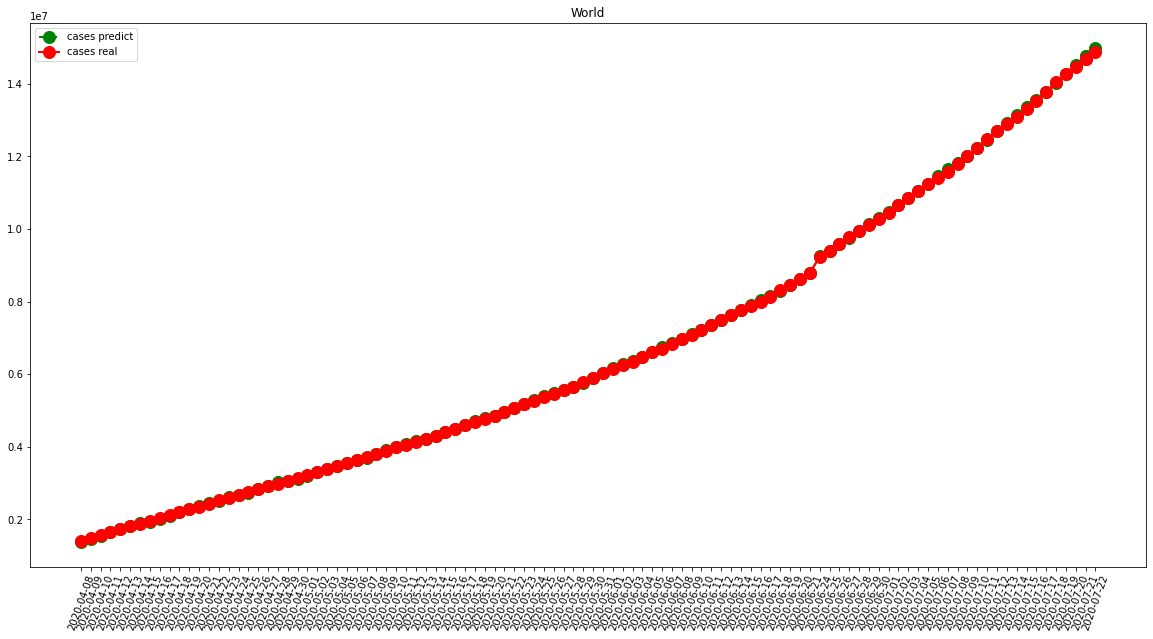

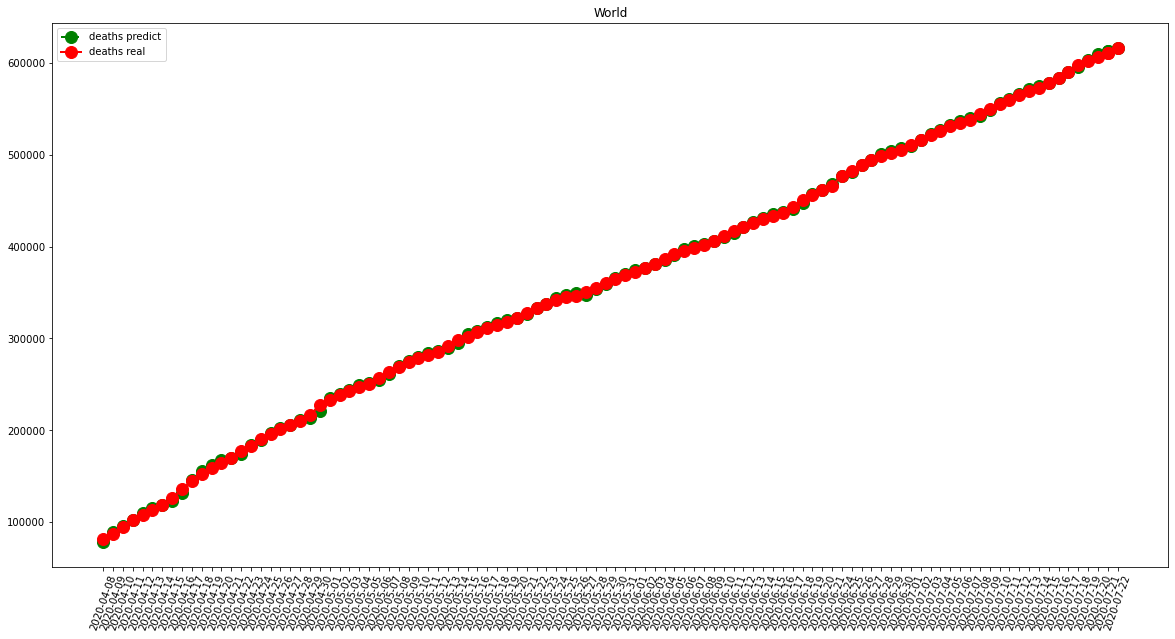

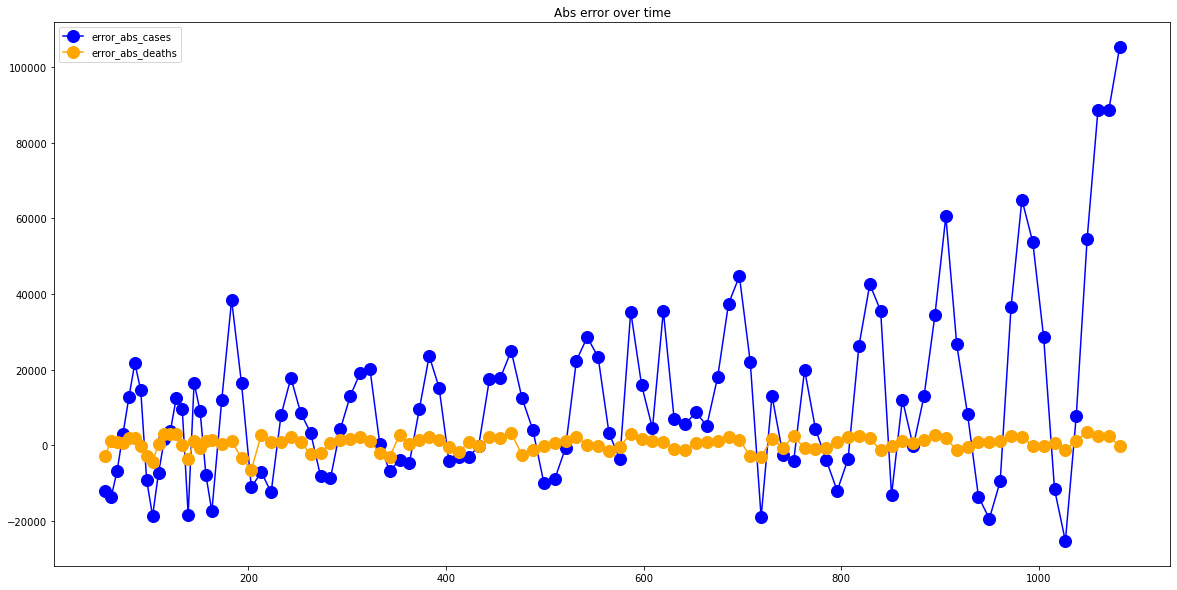

In [7]:
visShow("World")

-- France performances for cases --
MAE =  852.0956521739131
RMSE =  1388.193787374208
-- France performances for deaths --
MAE =  156.2608695652174
RMSE =  312.51034069847714


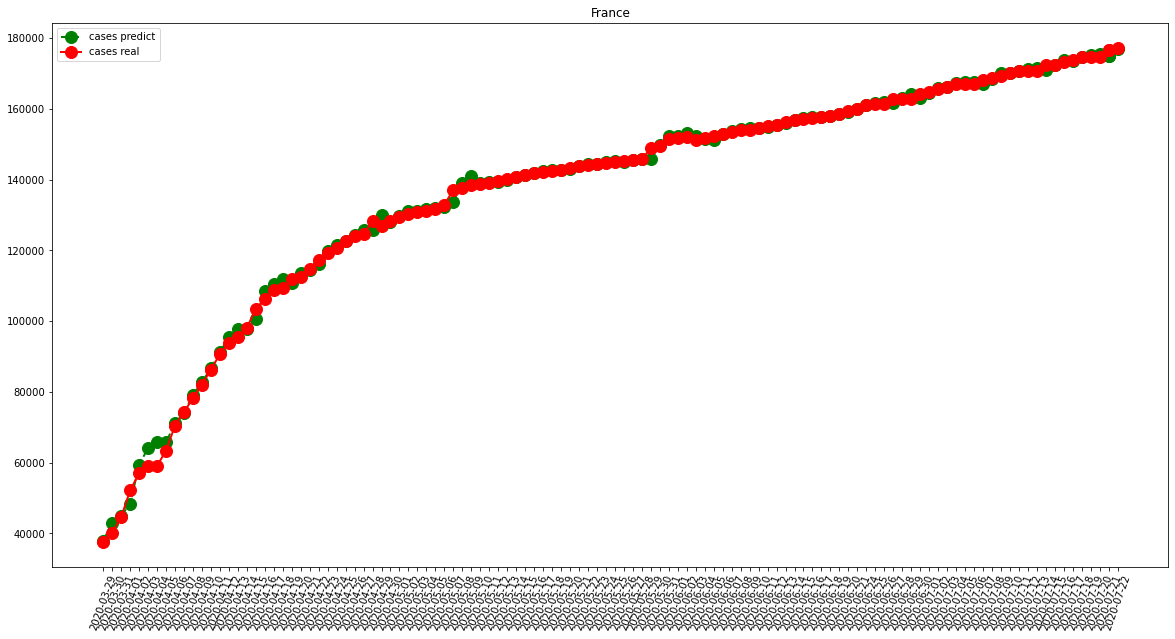

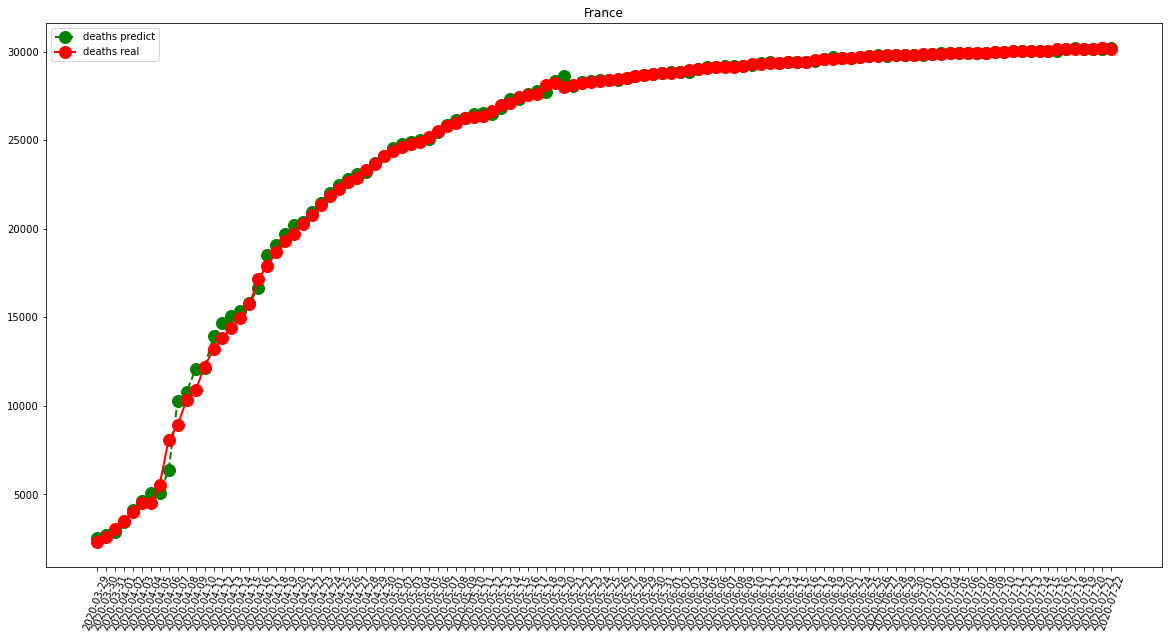

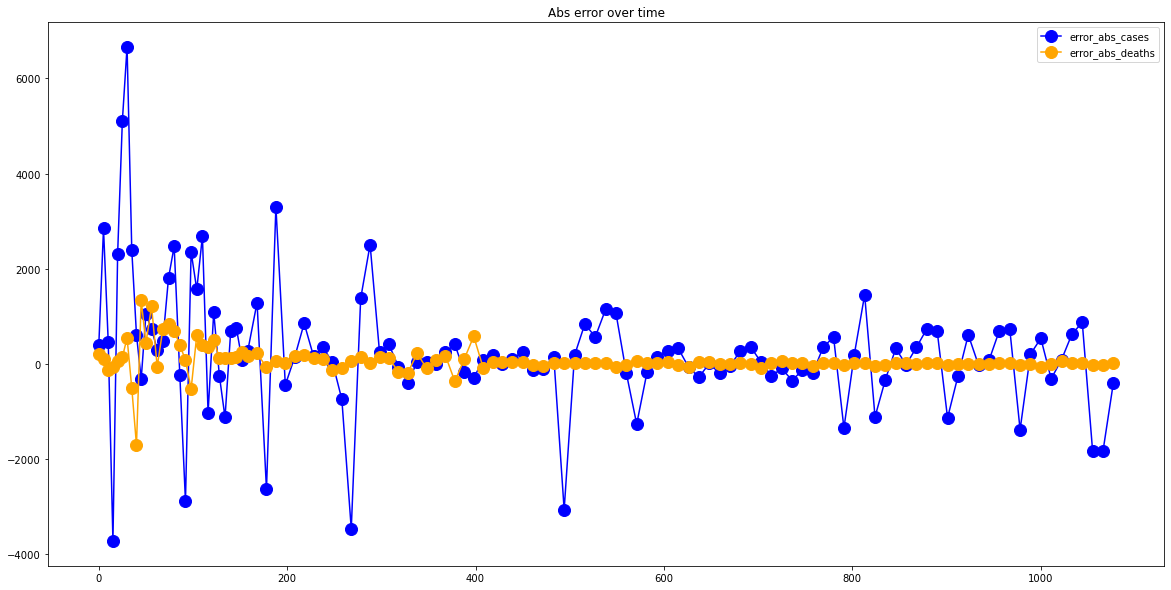

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  341.0521739130435
RMSE =  508.6259153239544
-- Italy performances for deaths --
MAE =  87.87826086956522
RMSE =  275.91722136082456


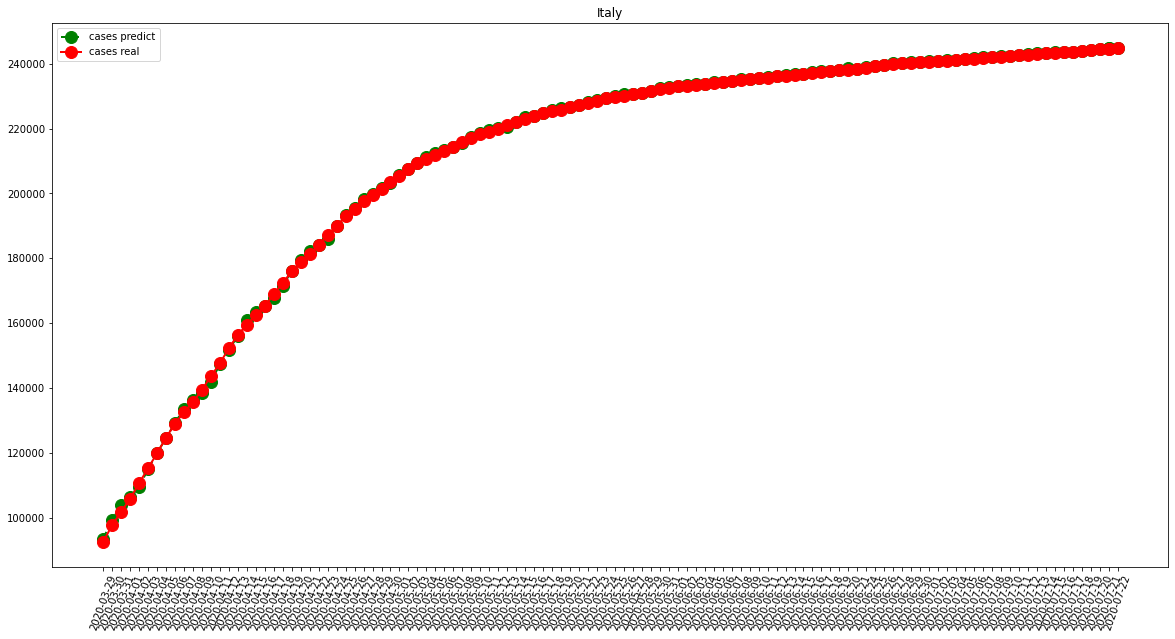

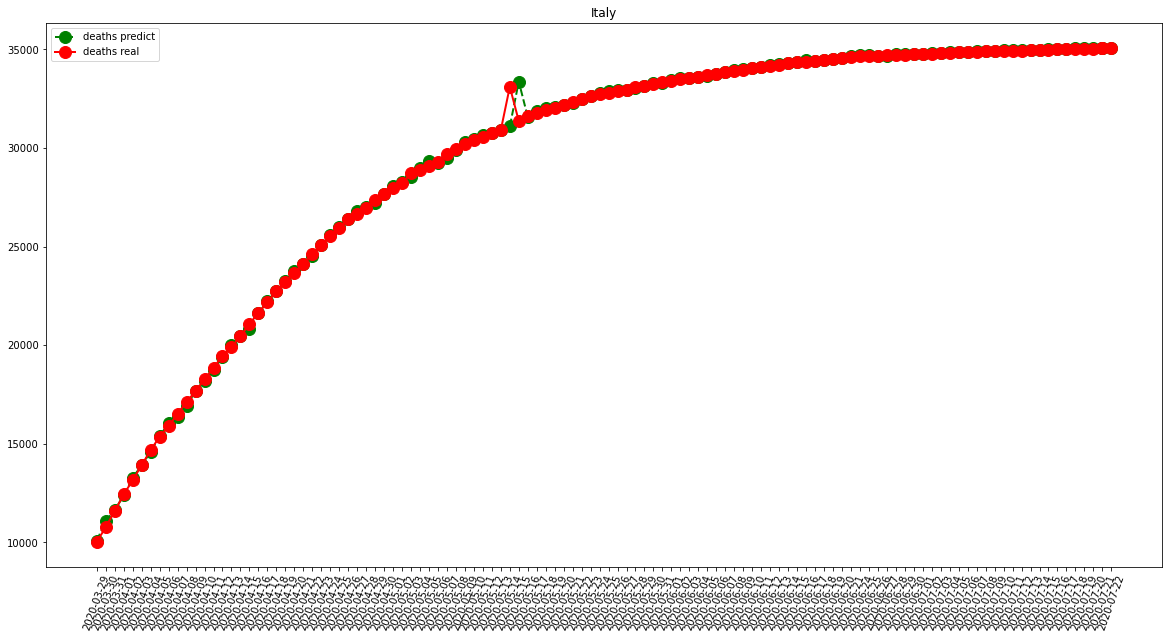

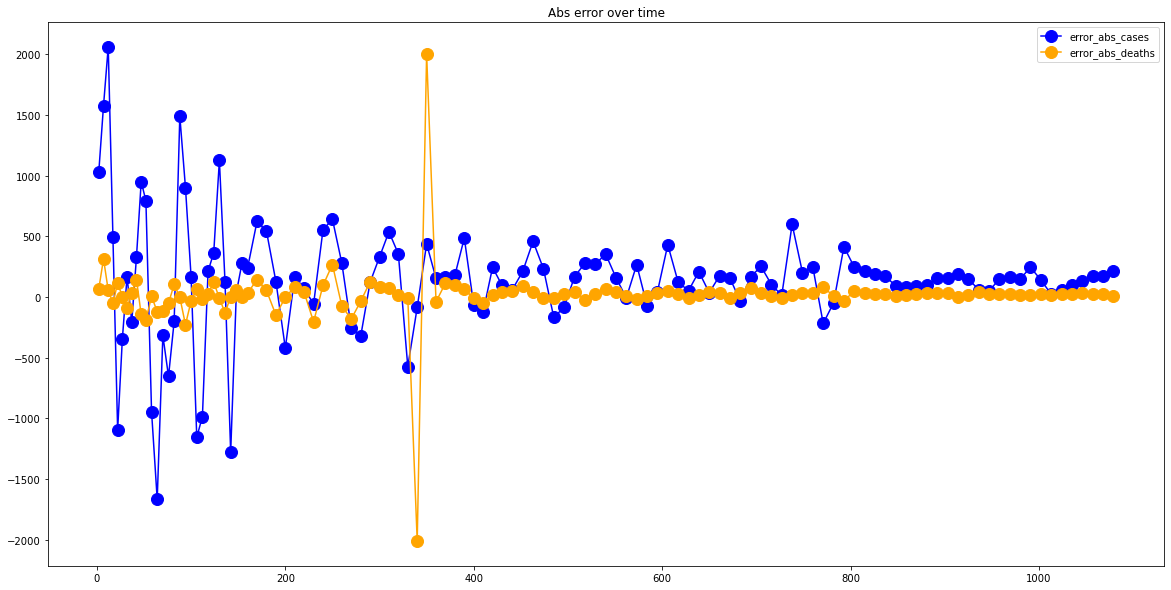

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  919.5739130434782
RMSE =  2026.7658816771202
-- Spain performances for deaths --
MAE =  159.3304347826087
RMSE =  378.5143613380217


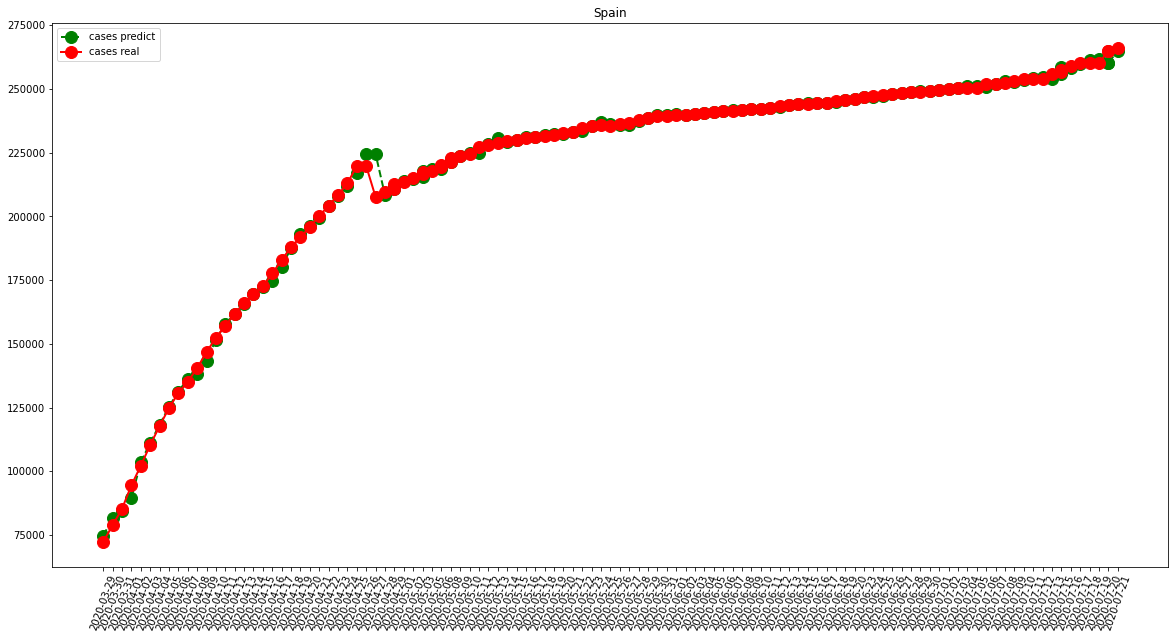

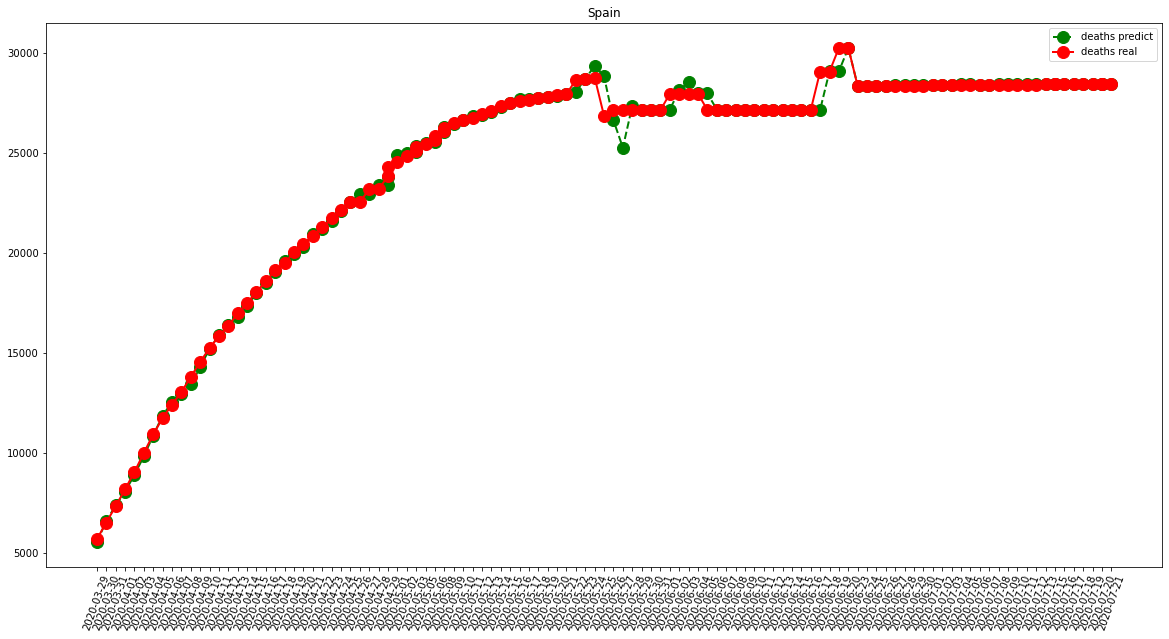

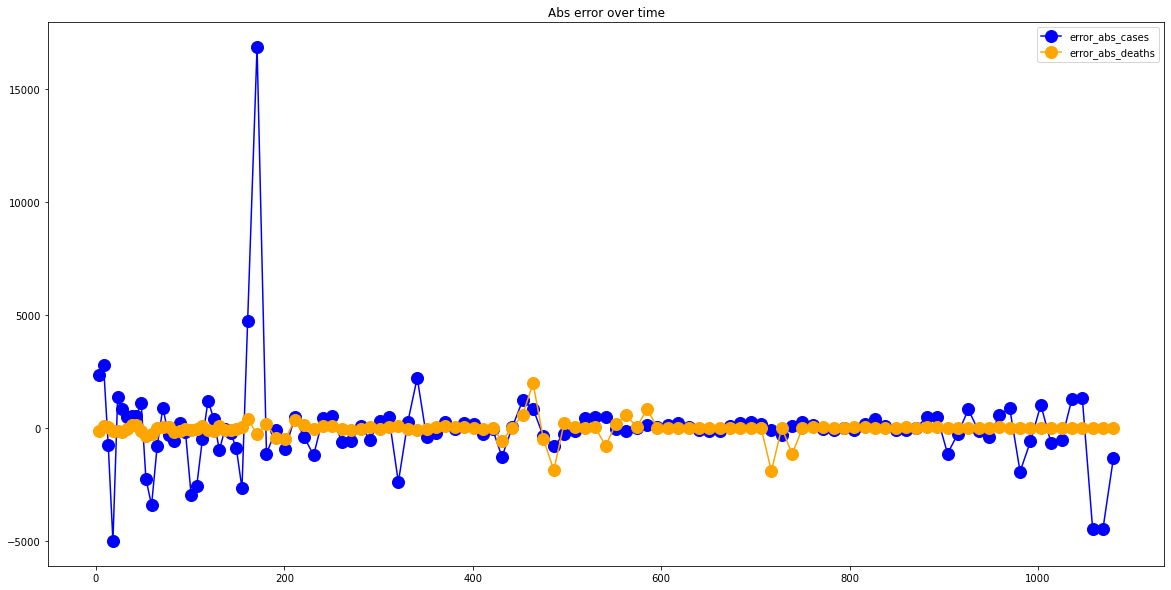

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5499.826086956522
RMSE =  7437.315527854762
-- United States performances for deaths --
MAE =  512.7217391304348
RMSE =  743.1412470341545


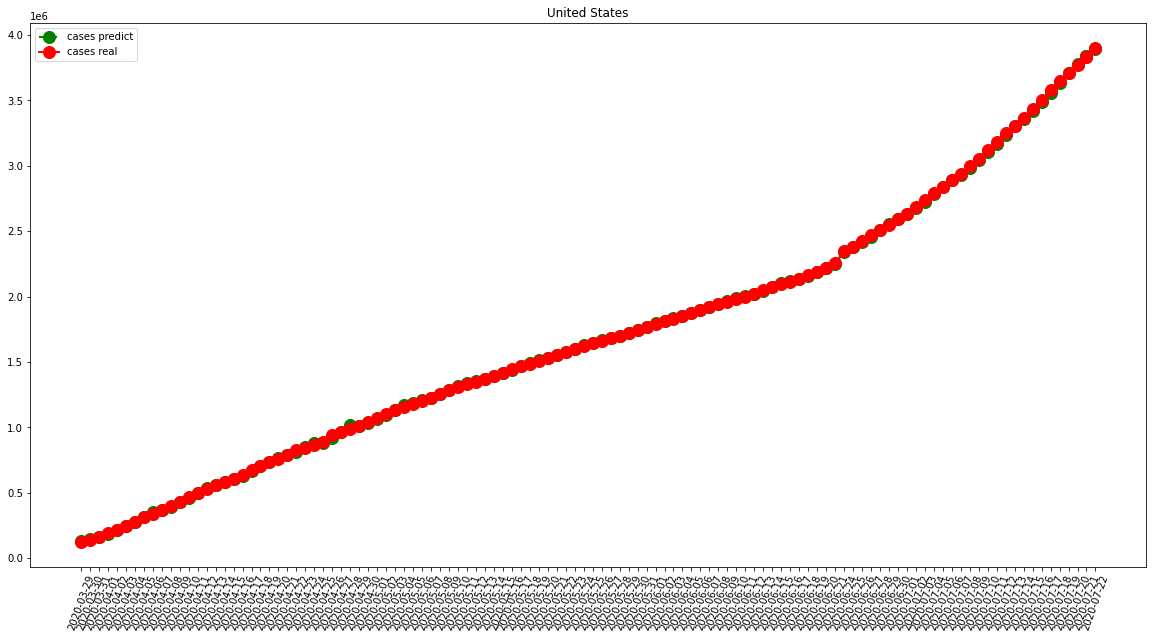

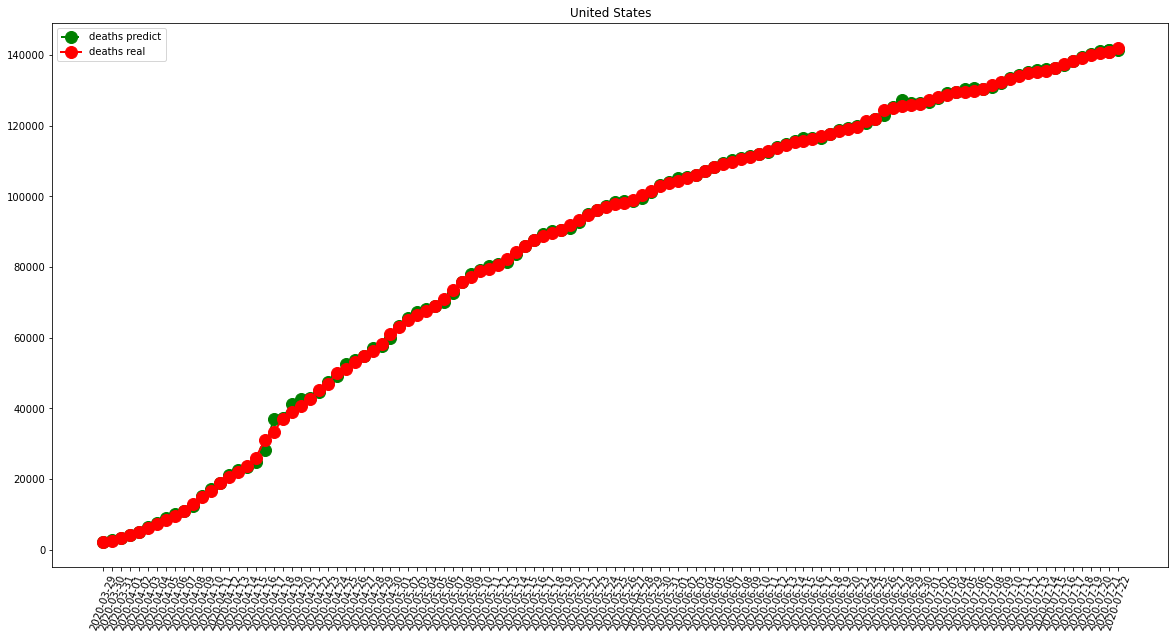

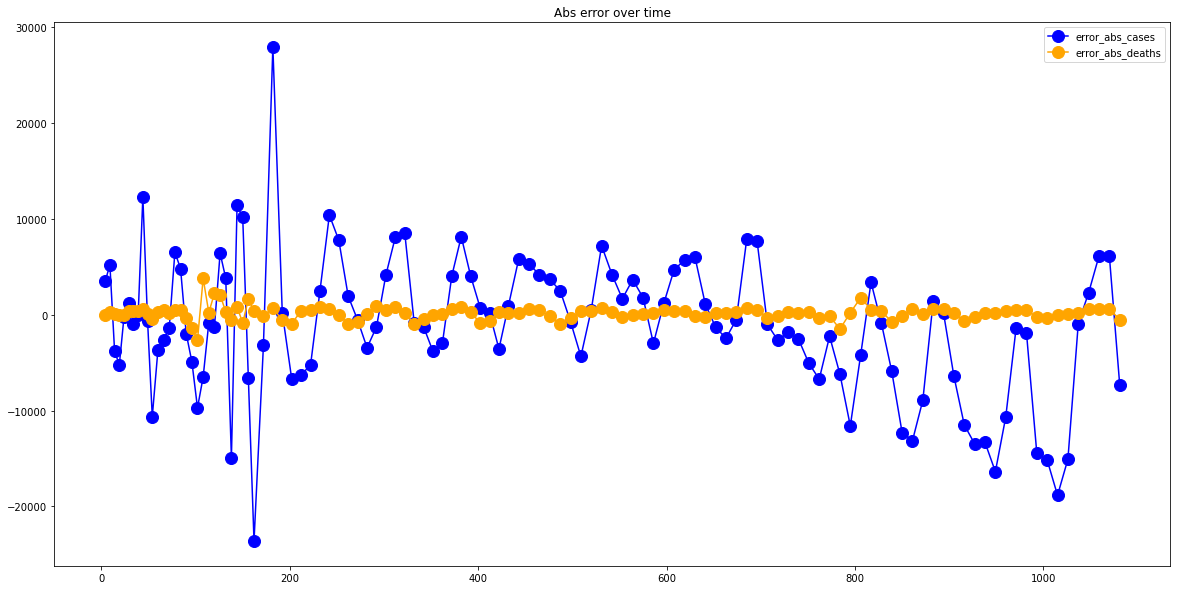

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  80.52173913043478
RMSE =  110.30416445289893
-- China performances for deaths --
MAE =  34.504347826086956
RMSE =  146.38905875009624


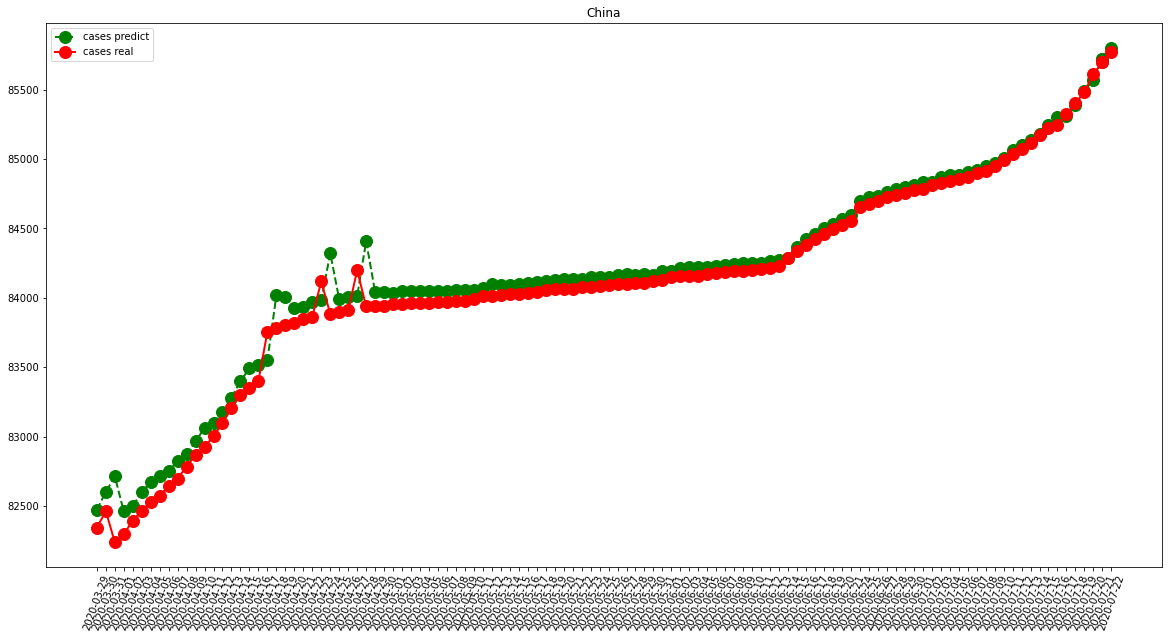

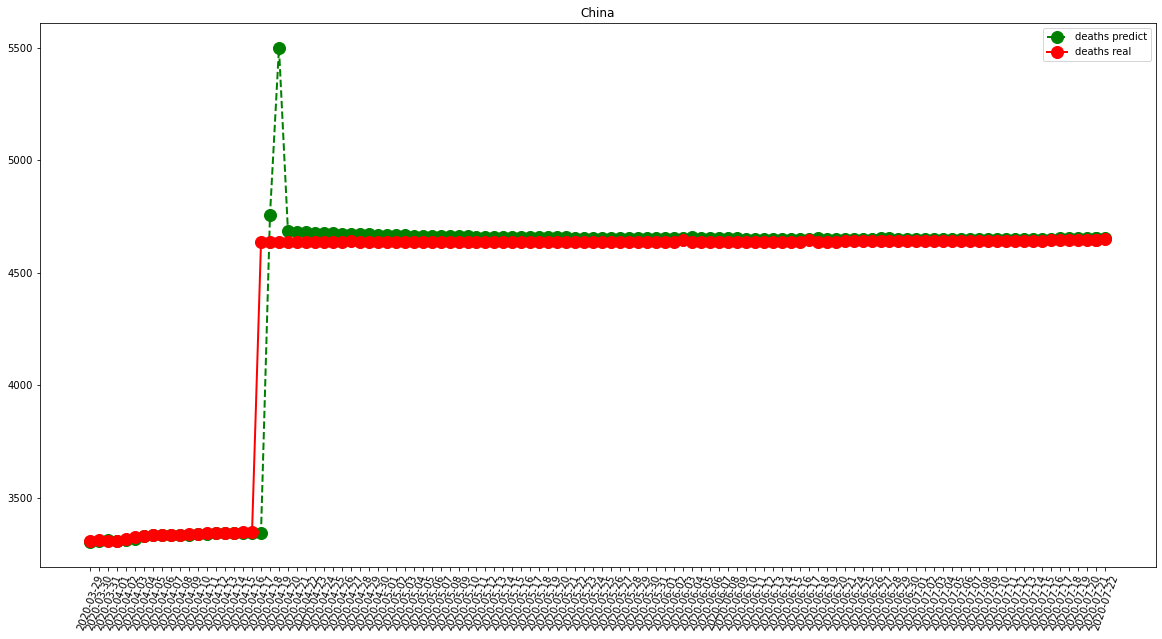

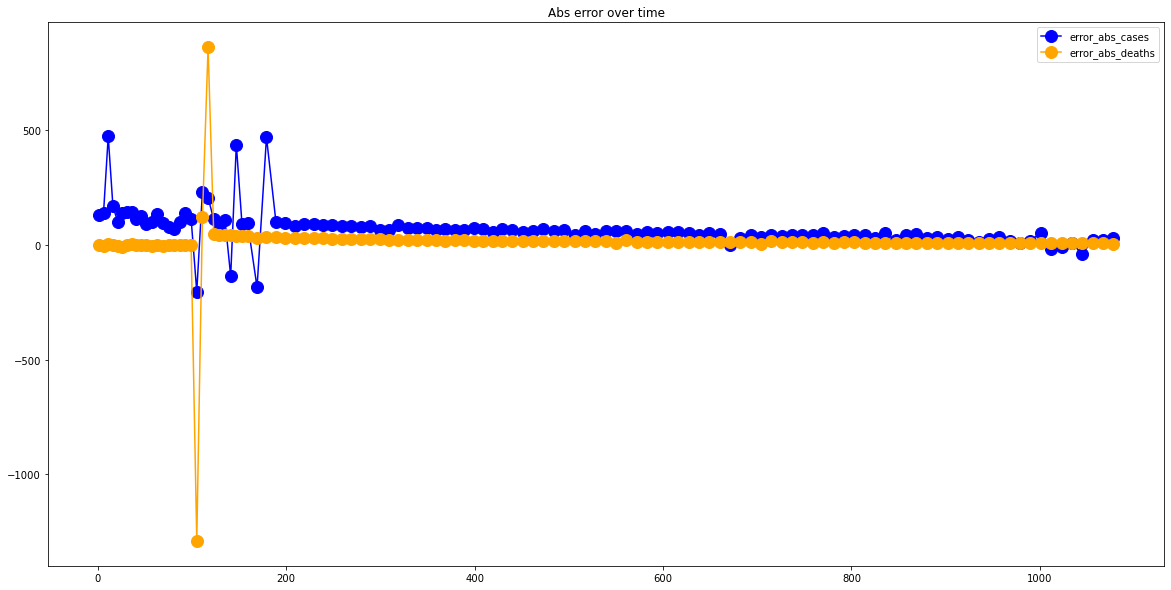

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1385.9770114942528
RMSE =  4473.830573457158
-- United Kingdom performances for deaths --
MAE =  214.7816091954023
RMSE =  525.6626032102656


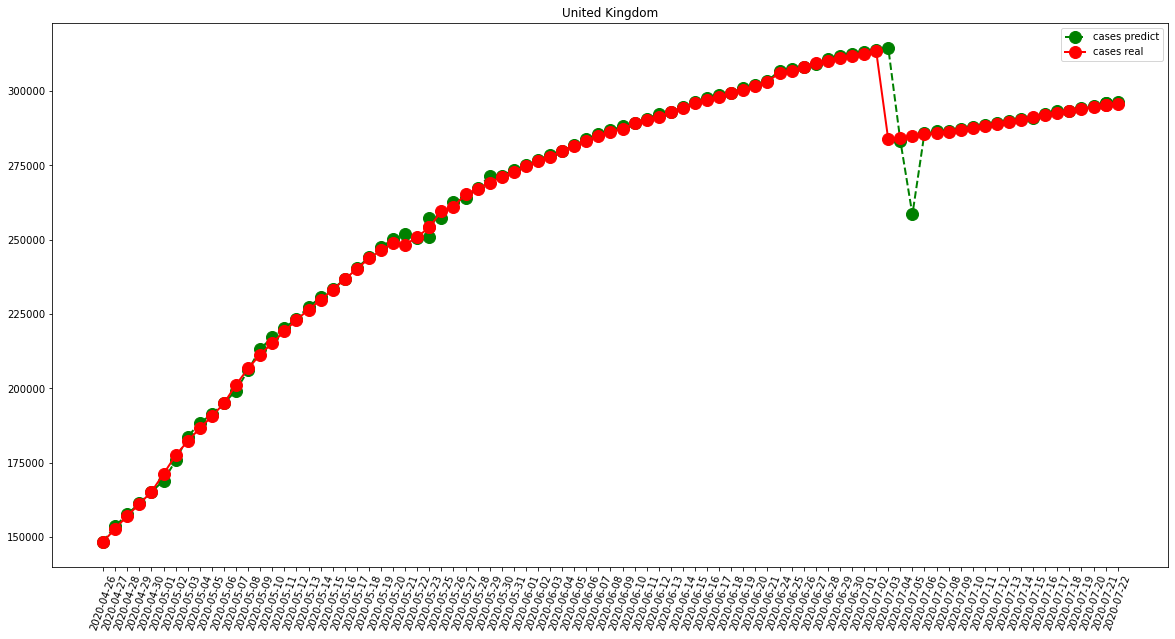

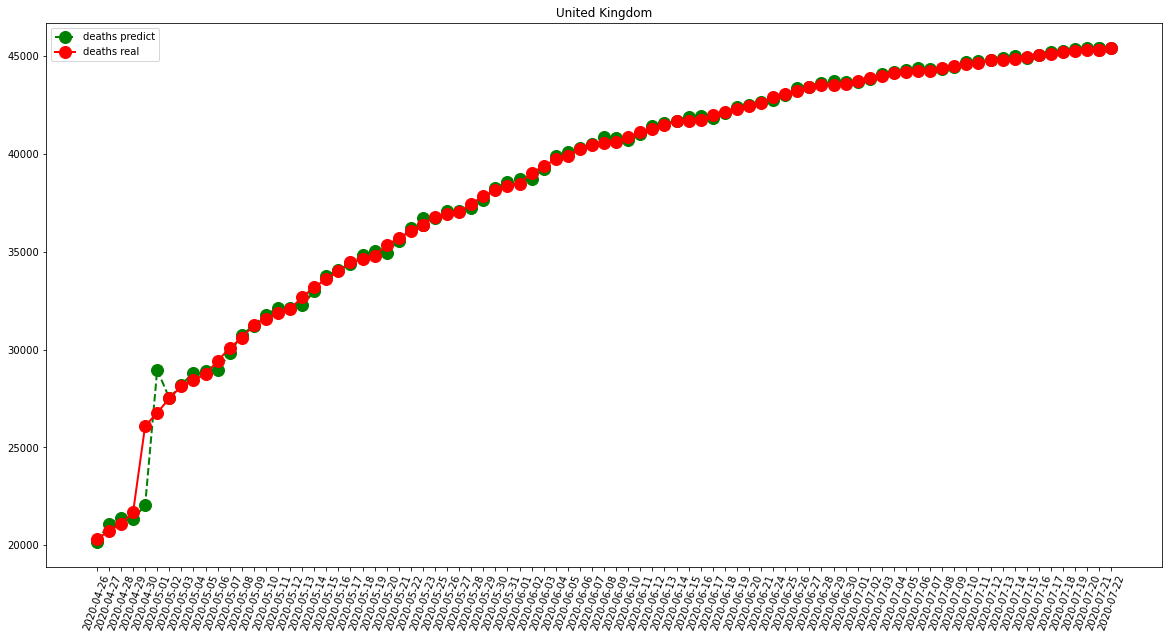

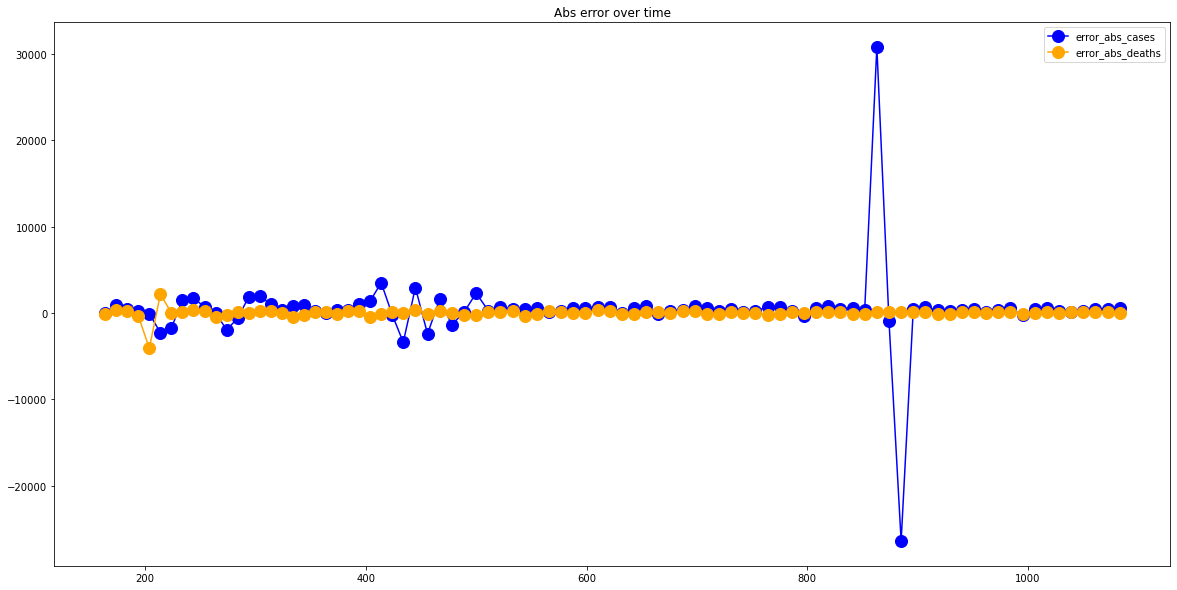

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  295.0689655172414
RMSE =  412.9039993069553
-- Germany performances for deaths --
MAE =  27.17241379310345
RMSE =  46.796944590309586


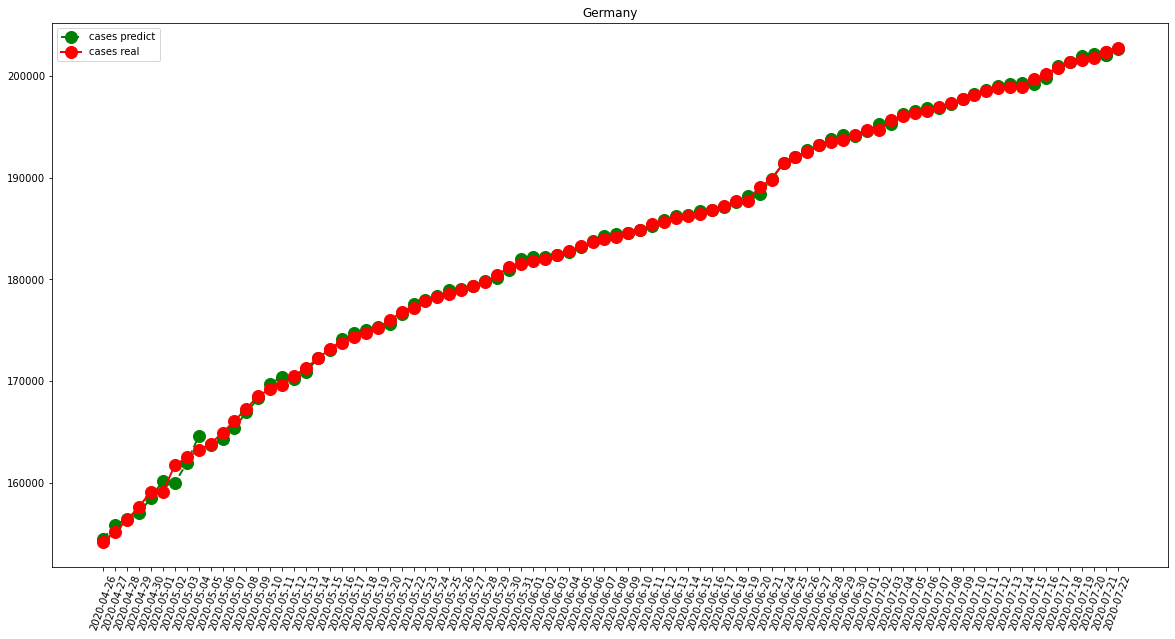

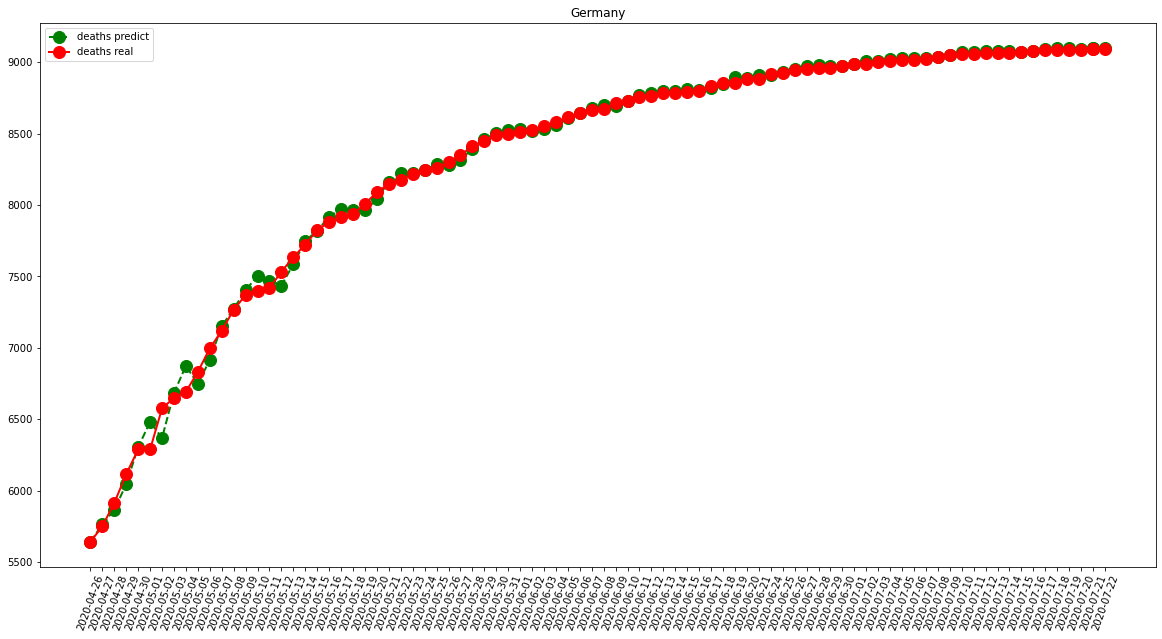

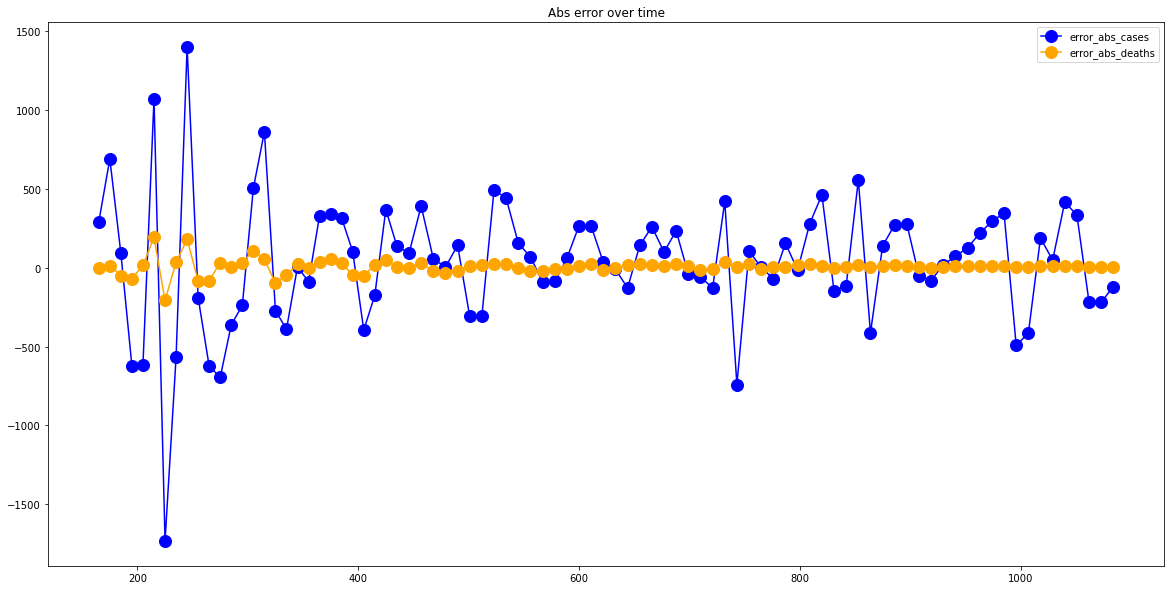

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  420.02298850574715
RMSE =  545.841583687757
-- Iran performances for deaths --
MAE =  20.137931034482758
RMSE =  30.393208557781154


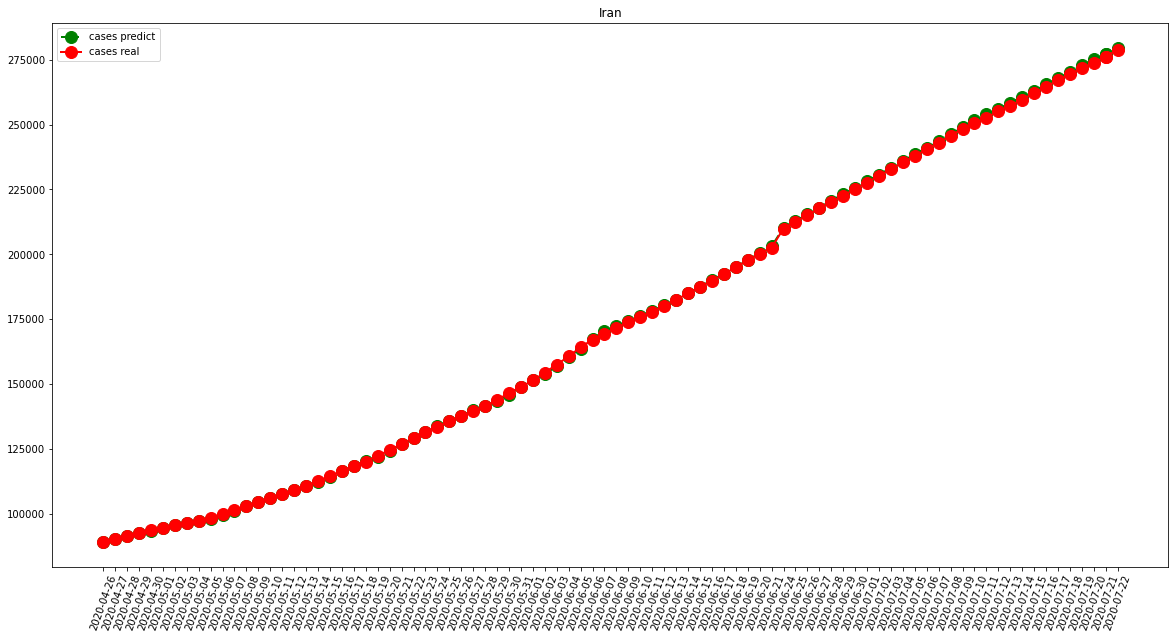

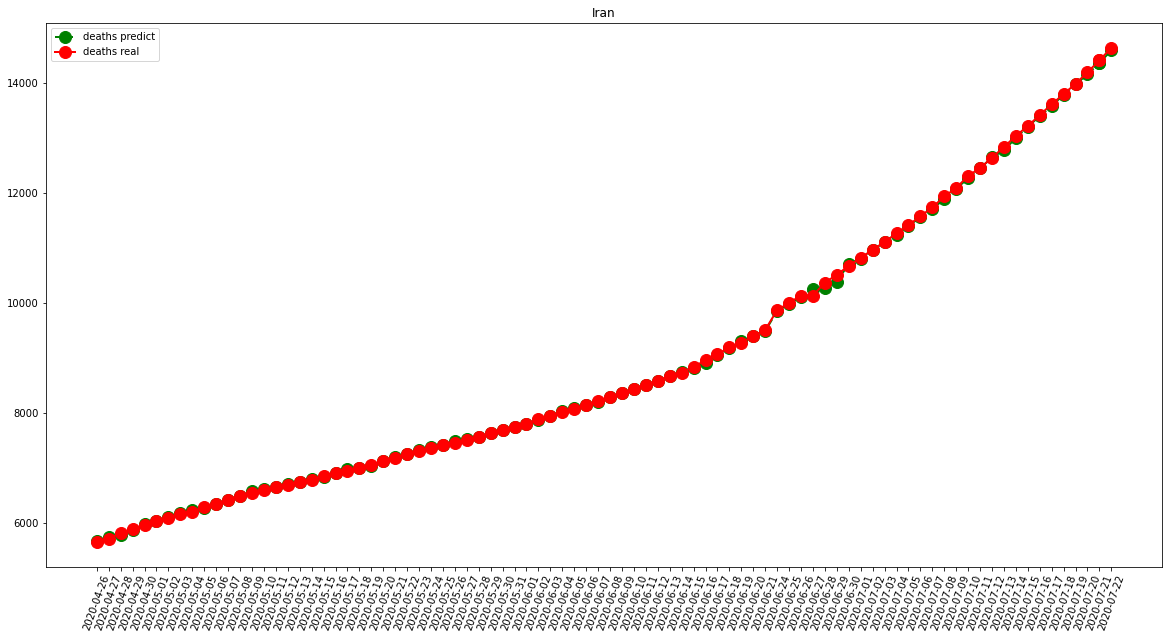

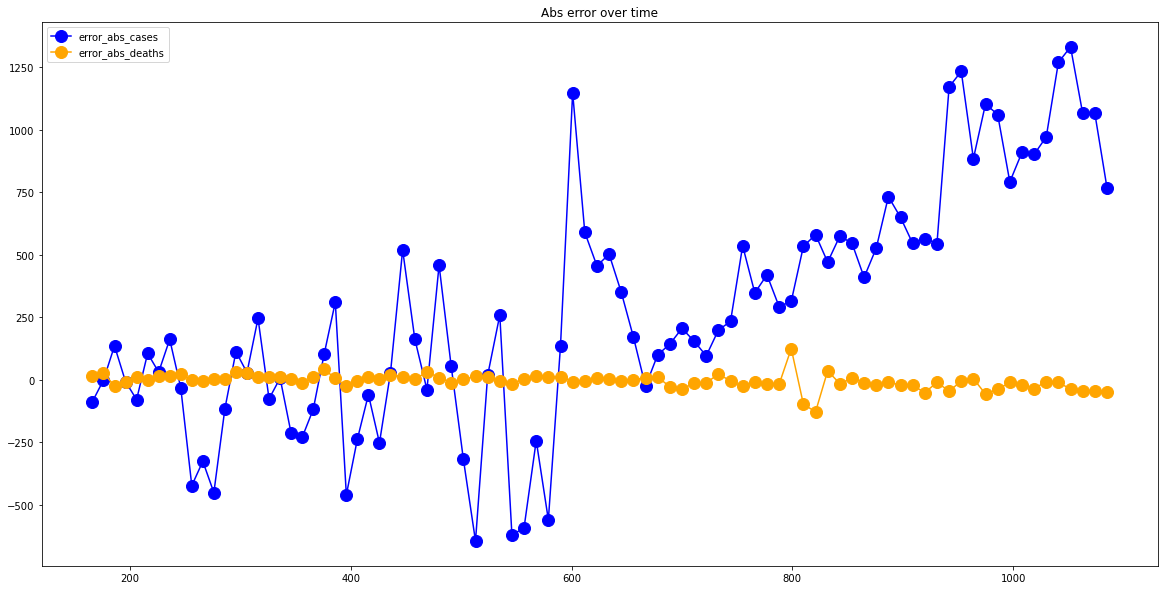

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  219.26436781609195
RMSE =  368.35905147640625
-- Turkey performances for deaths --
MAE =  21.50574712643678
RMSE =  108.8271327729726


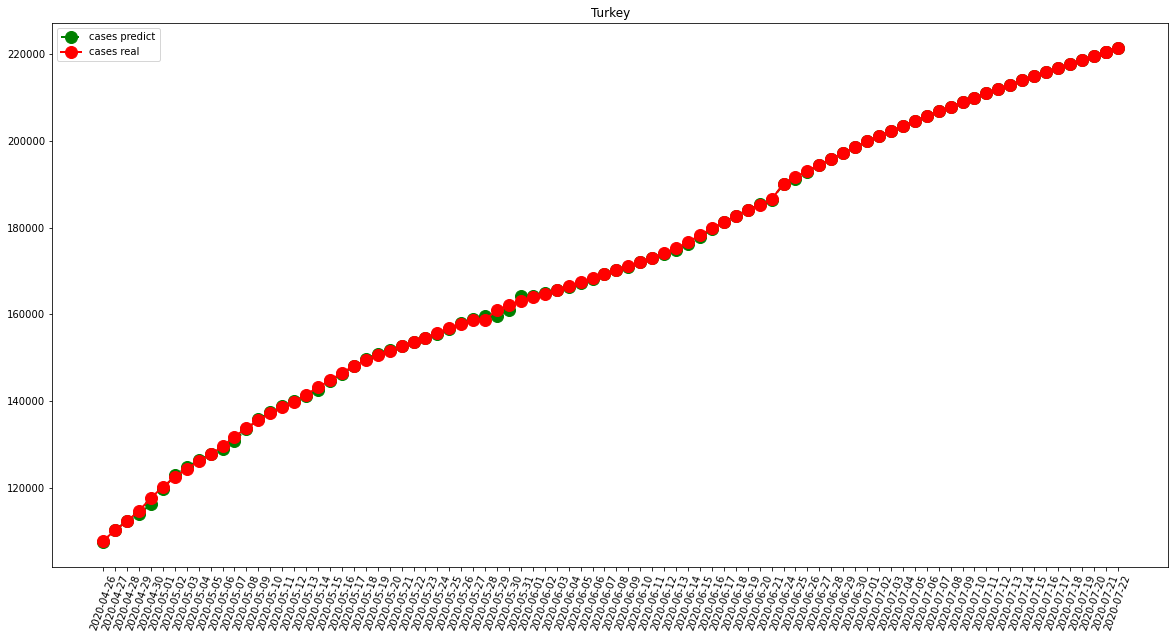

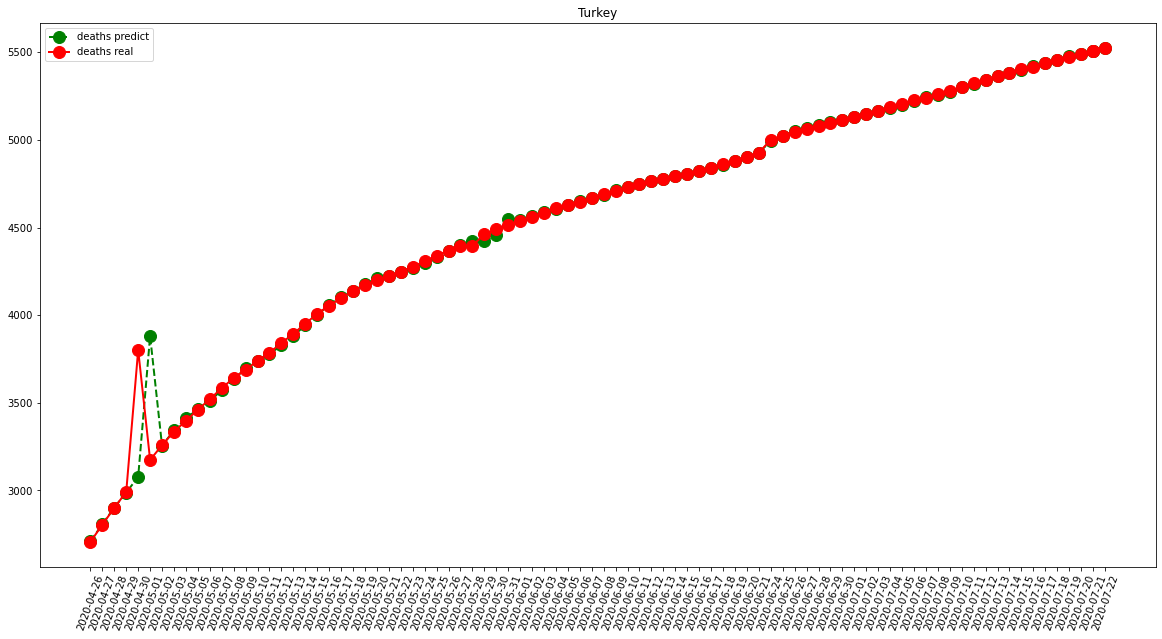

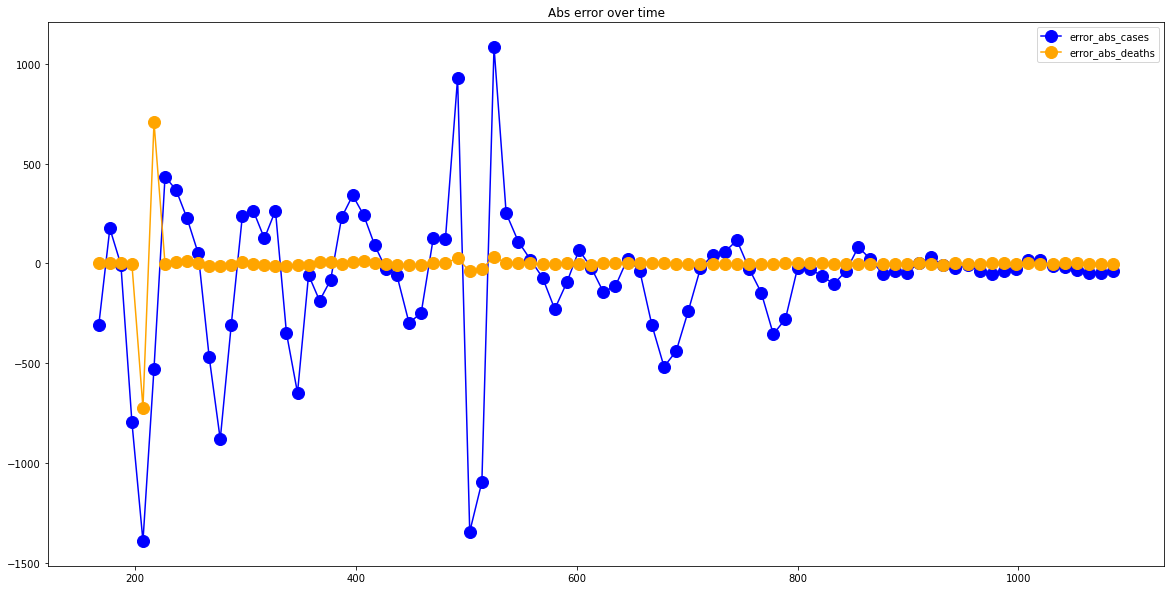

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10526.333333333334
RMSE =  13794.269191709045
-- Brazil performances for deaths --
MAE =  381.68333333333334
RMSE =  469.5374496956198


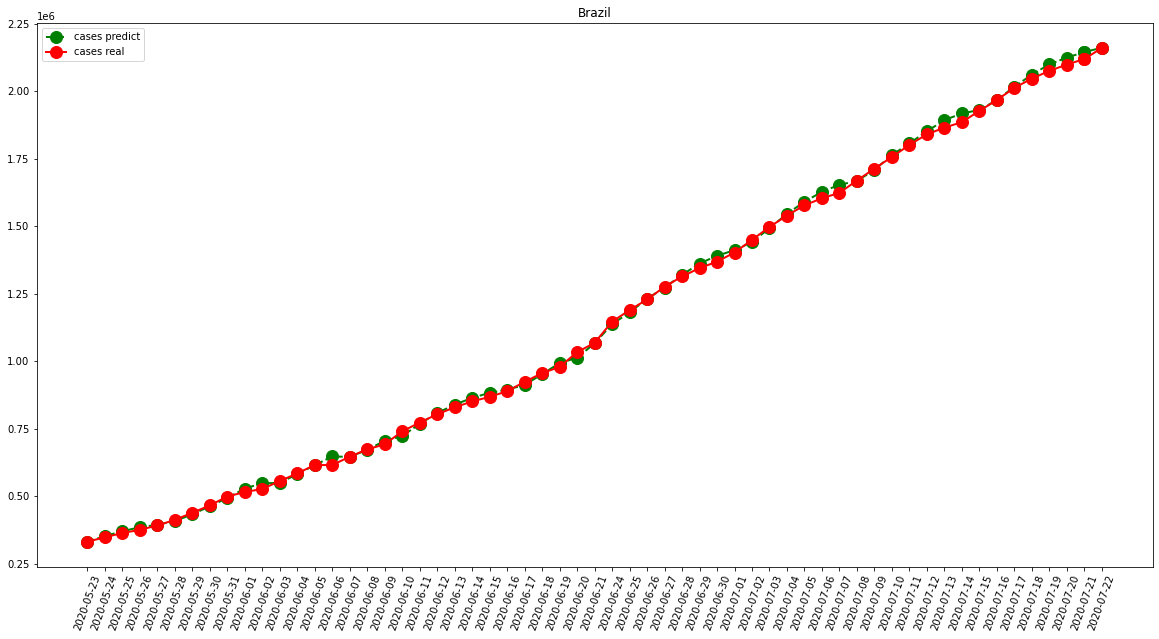

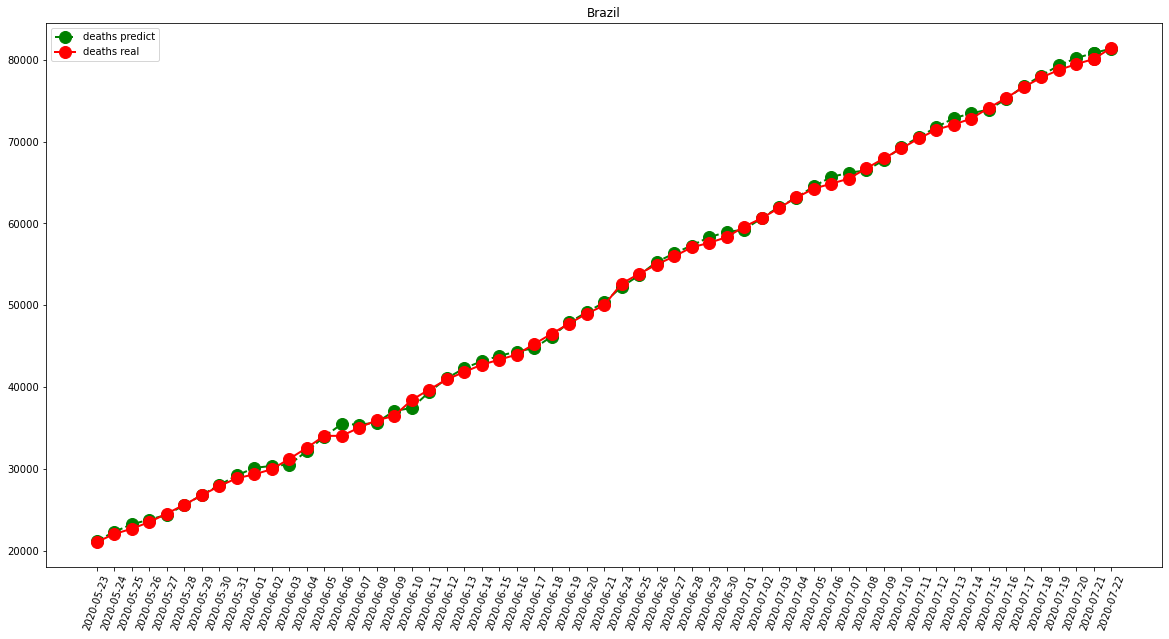

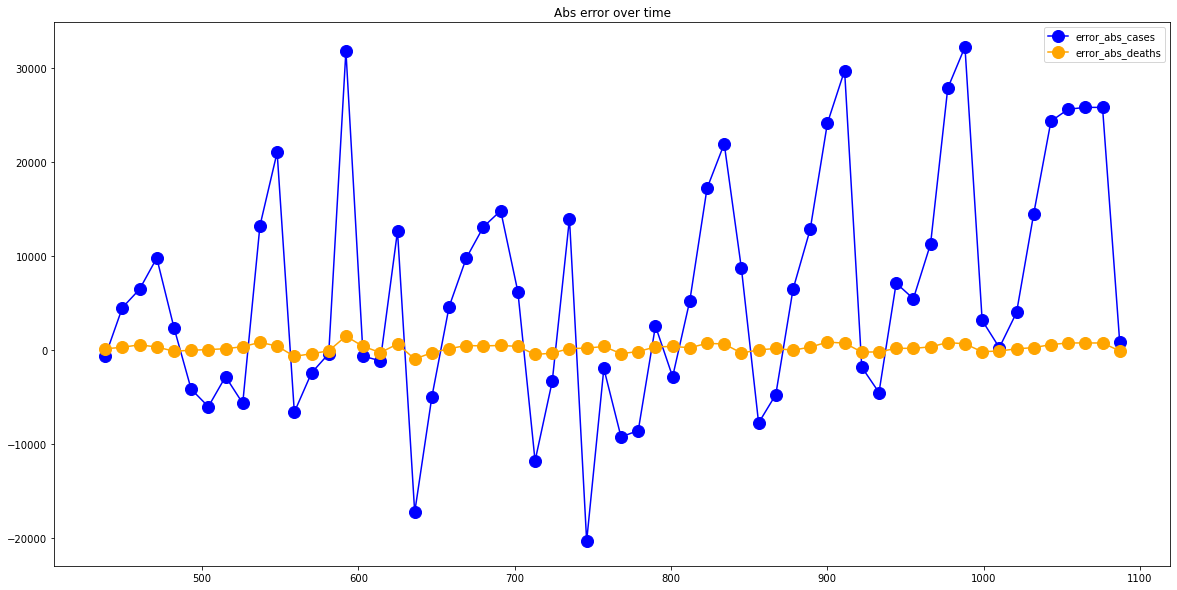

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)